In [ ]:
#!pip list

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn import svm
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks

from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score, classification_report

In [ ]:
data_df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [ ]:
data_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,78,0,3376,1,42,1,234548.185531,4.261991,124,1,1,91,0
1,91,1,4065,1,53,1,309007.676654,1.561064,131,0,1,46,1
2,68,1,1263,1,71,0,392908.722874,3.992001,146,1,1,38,0
3,54,0,5208,1,31,1,101338.544817,2.323896,121,1,0,142,1
4,82,0,3138,1,58,0,286924.306615,3.208349,147,0,0,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,50,1,2723,1,26,0,496853.326536,1.758666,149,0,1,101,1
296,67,0,490,0,34,0,213541.811443,4.740742,144,0,0,164,1
297,64,0,7134,0,19,1,243660.411866,4.430015,141,1,0,147,1
298,89,1,5151,0,51,1,253538.860747,1.227939,143,0,0,64,0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       300 non-null    int64  
 1   anaemia                   300 non-null    int64  
 2   creatinine_phosphokinase  300 non-null    int64  
 3   diabetes                  300 non-null    int64  
 4   ejection_fraction         300 non-null    int64  
 5   high_blood_pressure       300 non-null    int64  
 6   platelets                 300 non-null    float64
 7   serum_creatinine          300 non-null    float64
 8   serum_sodium              300 non-null    int64  
 9   sex                       300 non-null    int64  
 10  smoking                   300 non-null    int64  
 11  time                      300 non-null    int64  
 12  DEATH_EVENT               300 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.6 KB


<ipython-input-15-51bf7a378102>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=data_df['DEATH_EVENT'], palette=cols)


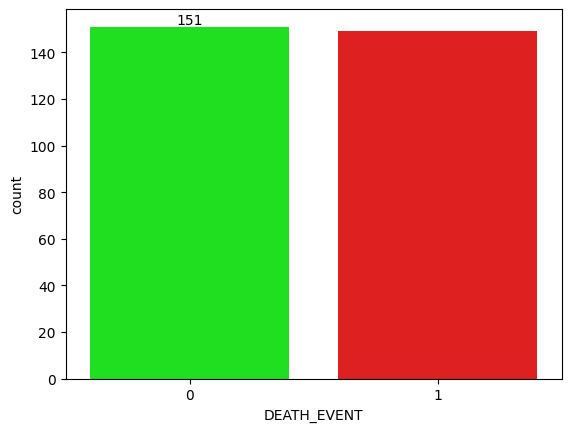

In [ ]:
cols=["#00FF00","#FF0000"]
ax=sns.countplot(x=data_df['DEATH_EVENT'], palette=cols)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,300.0,66.730000,16.042912,40.000000,53.000000,67.000000,80.000000,94.000000
anaemia,300.0,0.540000,0.499230,0.000000,0.000000,1.000000,1.000000,1.000000
creatinine_phosphokinase,300.0,3940.000000,2175.350076,134.000000,2099.000000,3734.000000,5747.250000,7923.000000
diabetes,300.0,0.486667,0.500657,0.000000,0.000000,0.000000,1.000000,1.000000
ejection_fraction,300.0,46.100000,18.951002,15.000000,29.000000,47.000000,63.000000,79.000000
high_blood_pressure,300.0,0.483333,0.500557,0.000000,0.000000,0.000000,1.000000,1.000000
platelets,300.0,305609.133241,119597.355394,100411.791938,200506.620467,311475.697988,409427.307584,498534.310323
serum_creatinine,300.0,2.711109,1.228855,0.505565,1.647662,2.766388,3.685604,4.979662
serum_sodium,300.0,129.850000,11.402084,110.000000,120.000000,130.000000,140.000000,149.000000
sex,300.0,0.523333,0.500290,0.000000,0.000000,1.000000,1.000000,1.000000


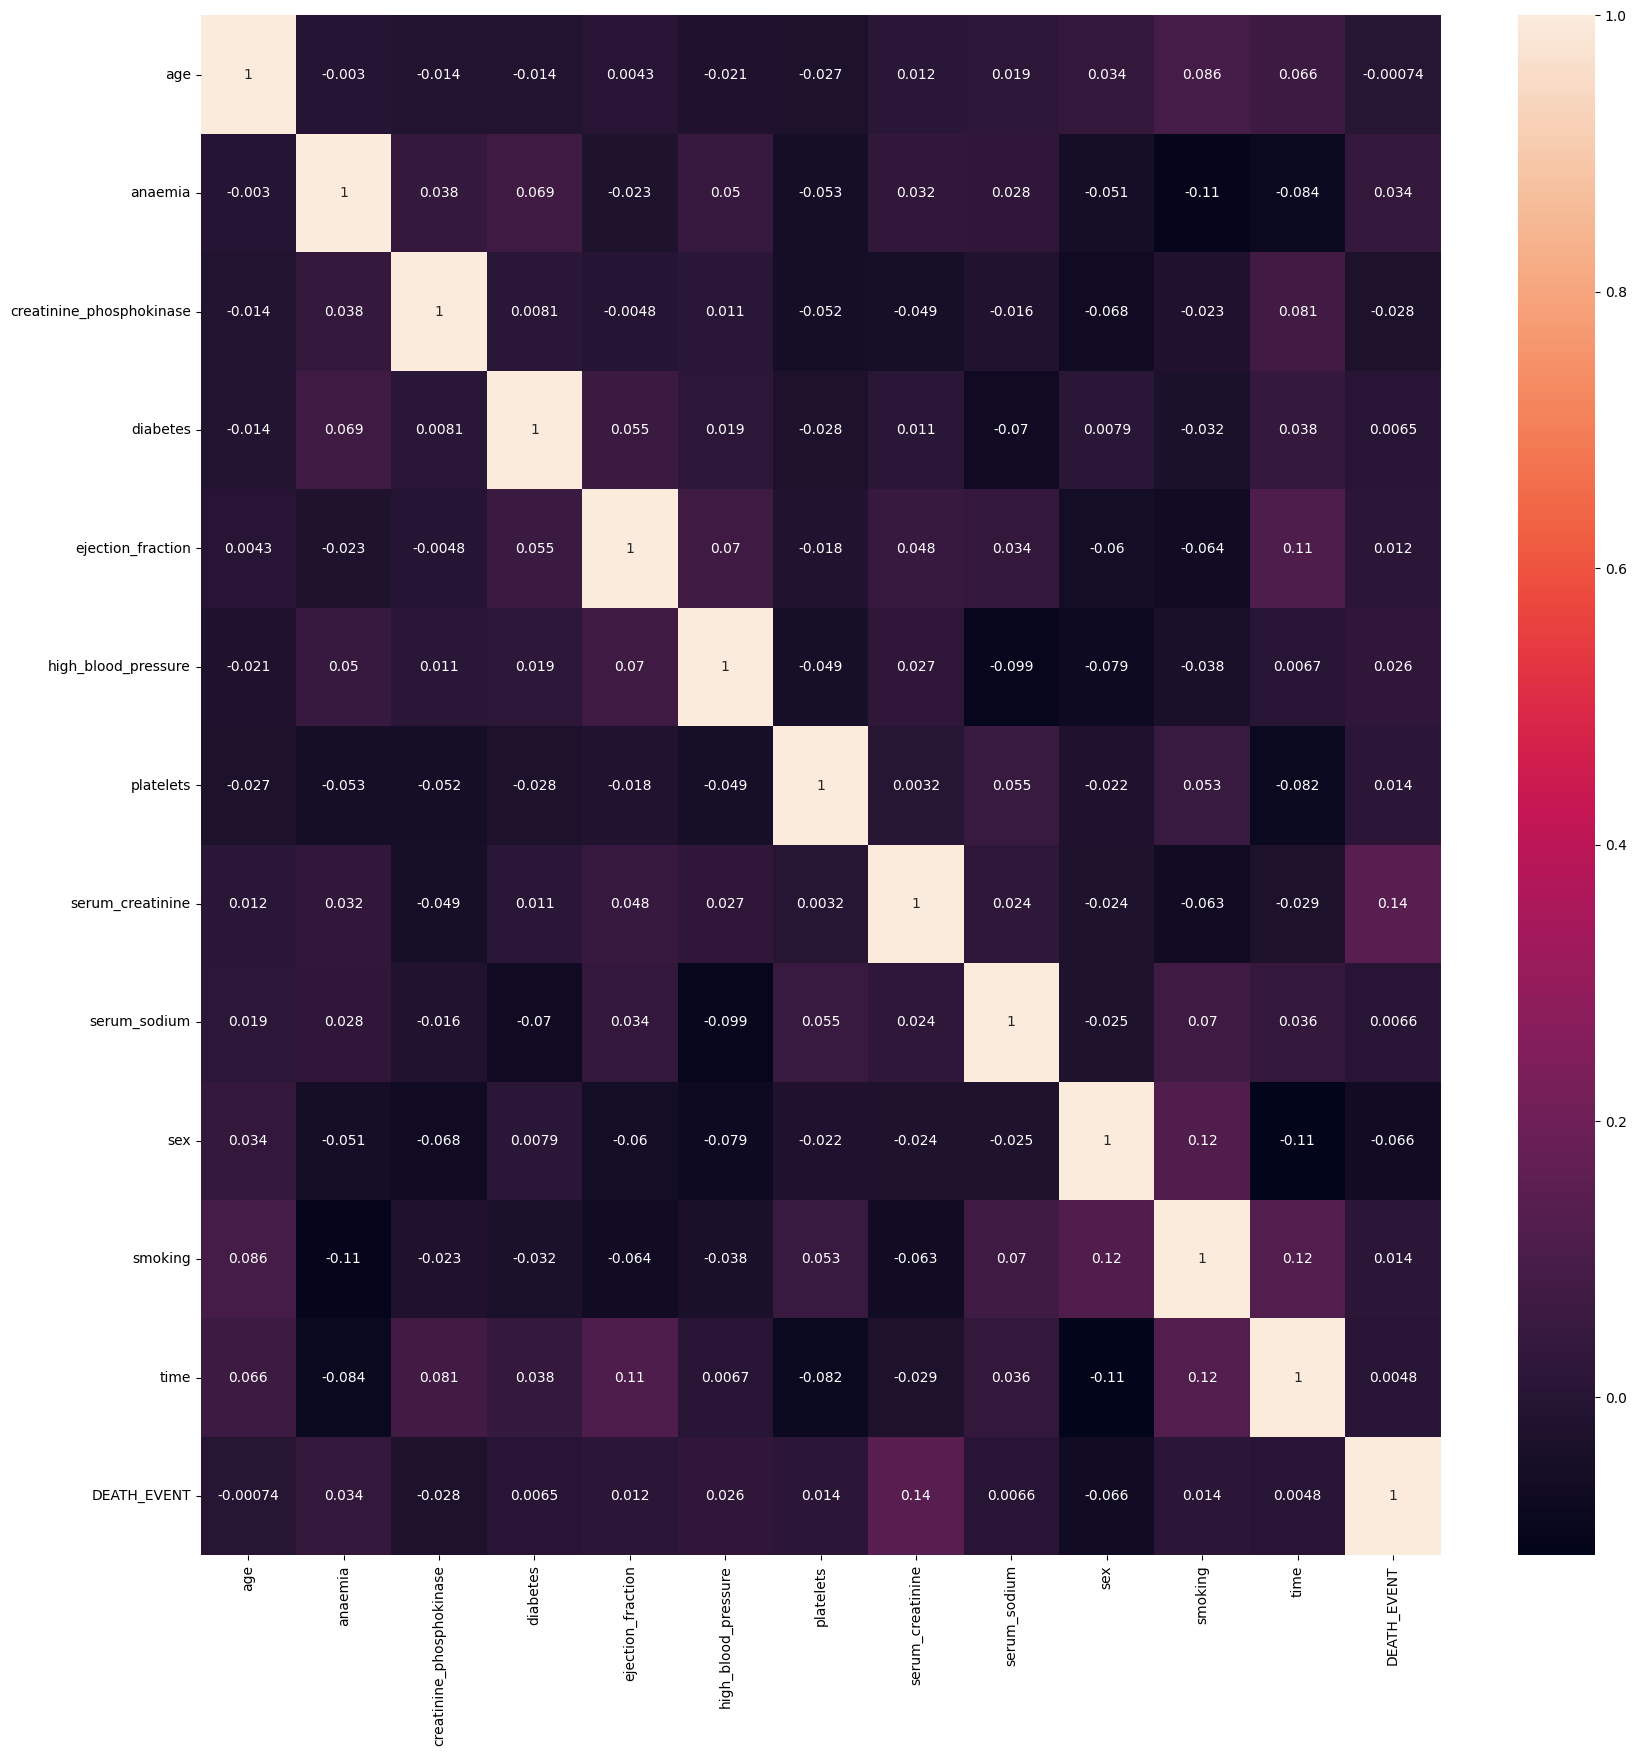

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(data_df.corr(), annot=True)
plt.show()

<ipython-input-20-835ca1ae881f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  days_of_week=sns.countplot(x=data_df['DEATH_EVENT'], palette=cols)


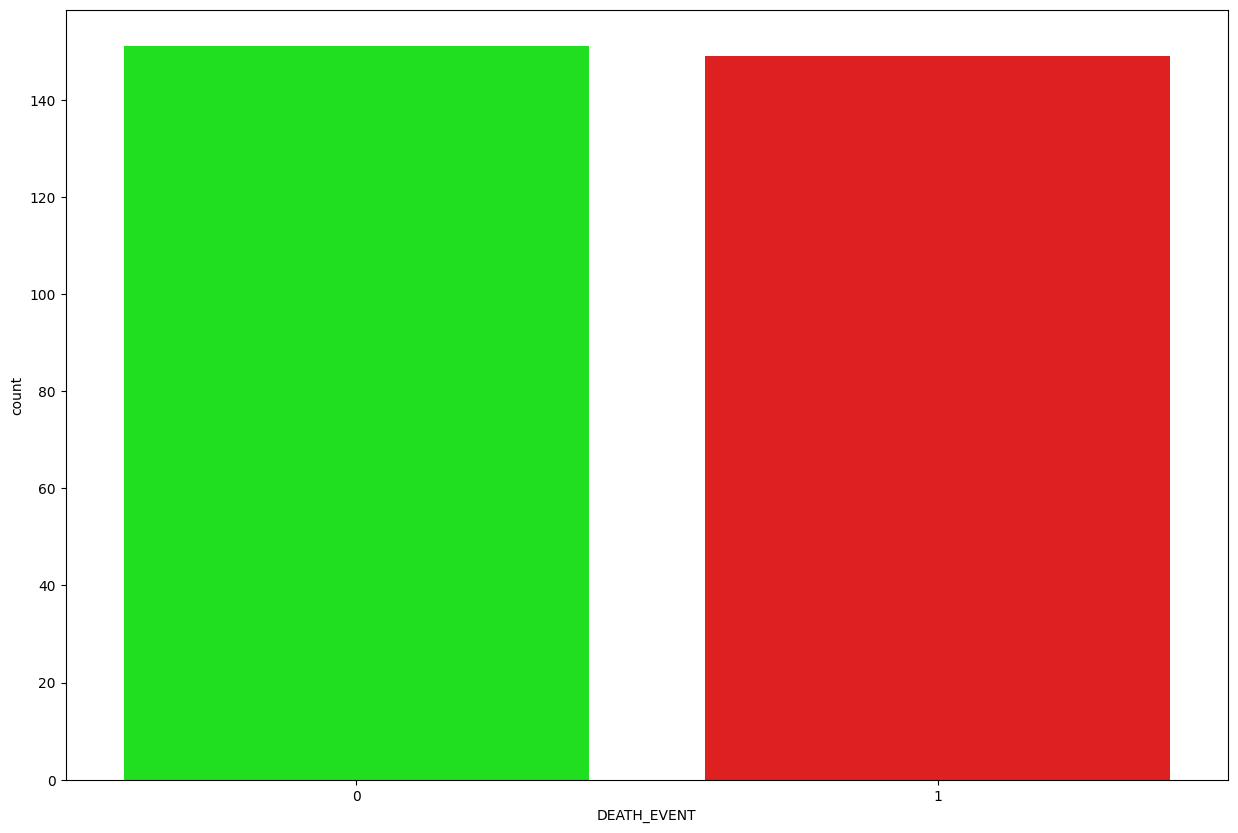

In [ ]:
plt.figure(figsize=(15,10))
days_of_week=sns.countplot(x=data_df['DEATH_EVENT'], palette=cols)
#days_of_week.bar_label(days_of_week.containers[0])
#plt.show()

<ipython-input-21-b14ef4a315c4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)
<ipython-input-21-b14ef4a315c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)


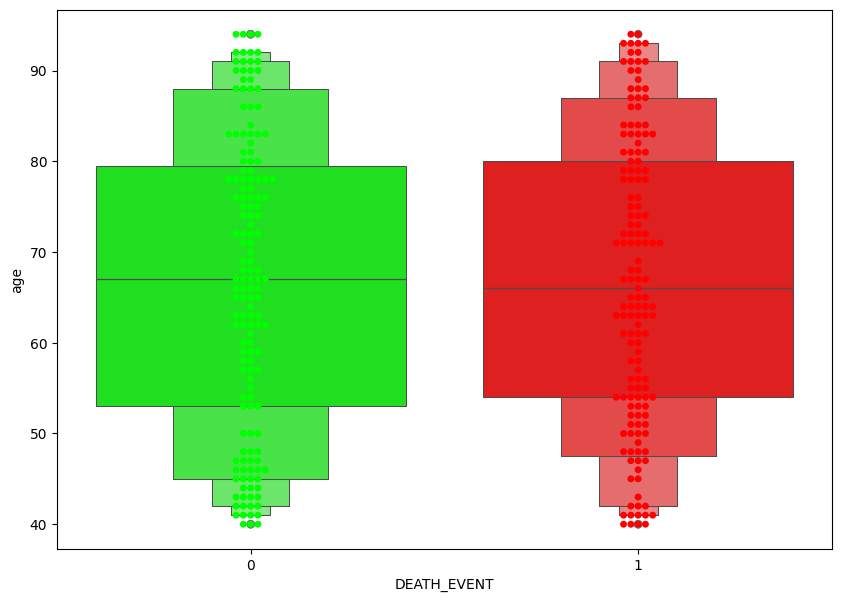

<ipython-input-21-b14ef4a315c4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)
<ipython-input-21-b14ef4a315c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)


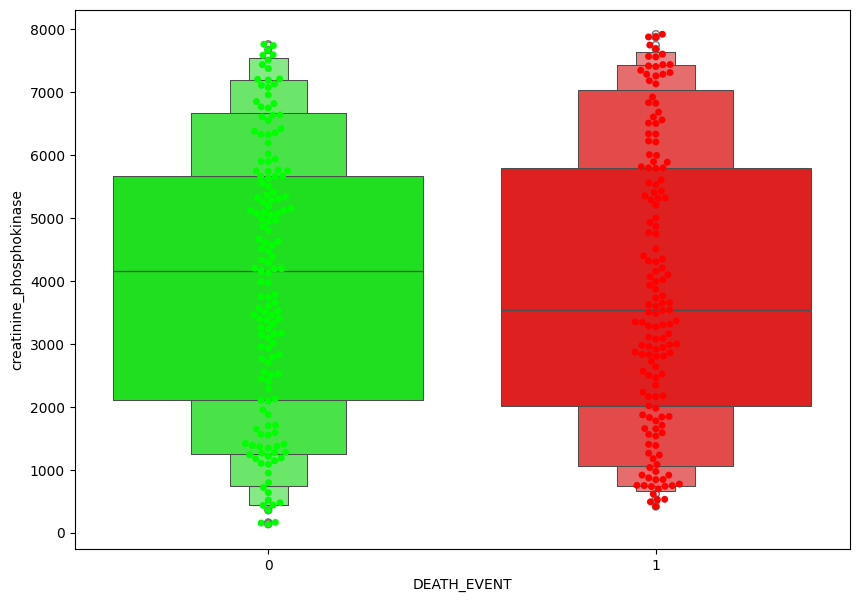

<ipython-input-21-b14ef4a315c4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)
<ipython-input-21-b14ef4a315c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)


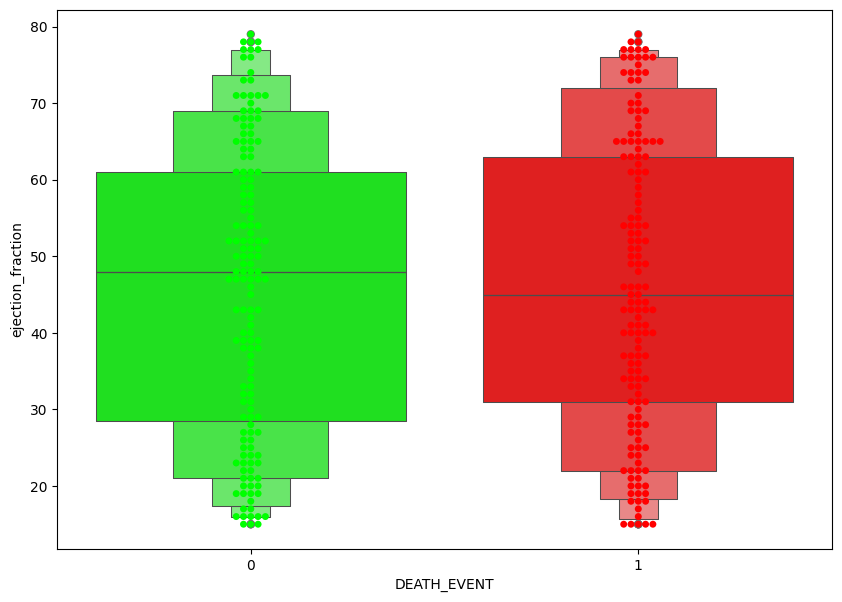

<ipython-input-21-b14ef4a315c4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)
<ipython-input-21-b14ef4a315c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)


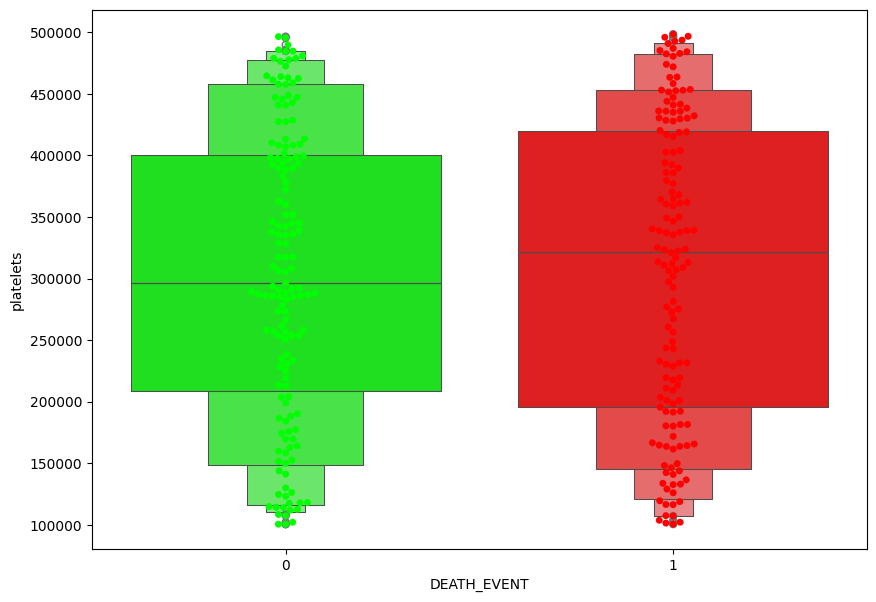

<ipython-input-21-b14ef4a315c4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)
<ipython-input-21-b14ef4a315c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)


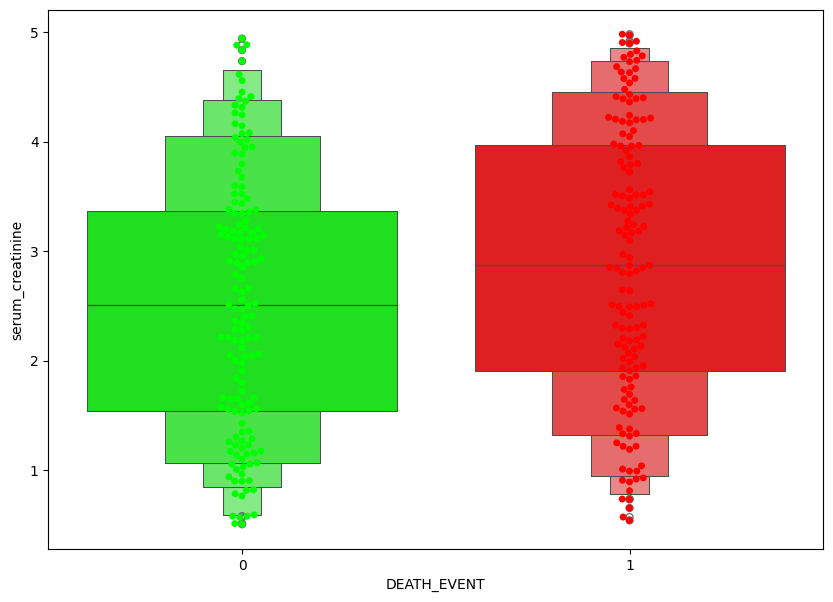

<ipython-input-21-b14ef4a315c4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)
<ipython-input-21-b14ef4a315c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)


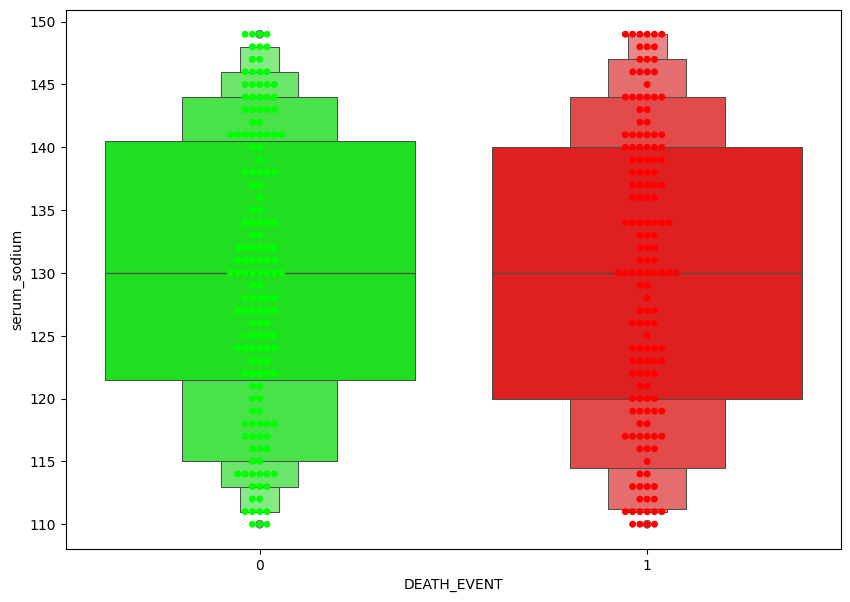

<ipython-input-21-b14ef4a315c4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)
<ipython-input-21-b14ef4a315c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)


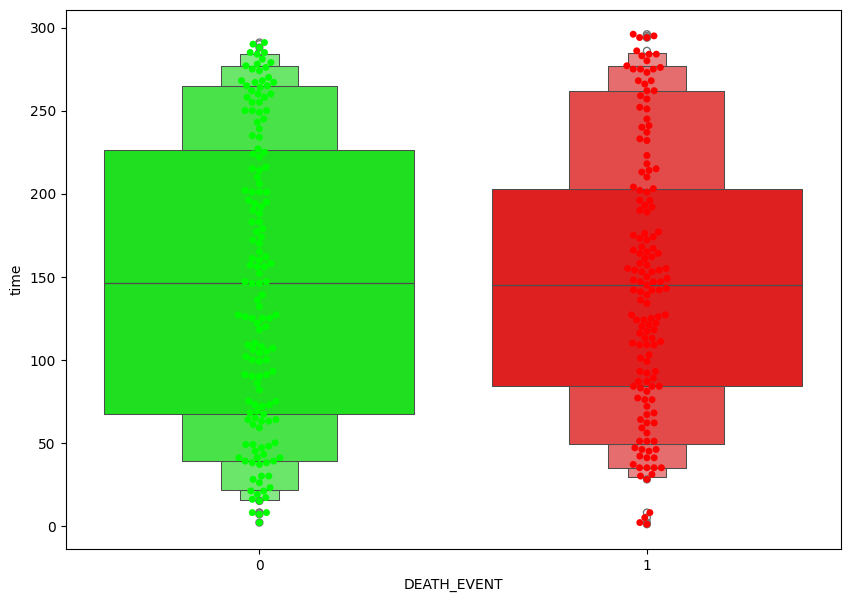

In [ ]:
feature=["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
for i in feature:
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)
    sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)
    #sns.countplot(x=data_df[i], palette=cols)
    plt.show()

In [ ]:
X=data_df.drop(["DEATH_EVENT"], axis=1)
y=data_df["DEATH_EVENT"]

In [ ]:
col_name=list(X.columns)
s_scaler=preprocessing.StandardScaler()
X_scaled=s_scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=col_name)

In [ ]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,300.0,-2.538710e-16,1.001671,-1.668940,-0.857260,0.016858,0.828539,1.702656
anaemia,300.0,-1.480297e-17,1.001671,-1.083473,-1.083473,0.922958,0.922958,0.922958
creatinine_phosphokinase,300.0,-4.440892e-18,1.001671,-1.752527,-0.847715,-0.094856,0.832174,1.834029
diabetes,300.0,-5.033011e-17,1.001671,-0.973680,-0.973680,-0.973680,1.027032,1.027032
ejection_fraction,300.0,-7.105427e-17,1.001671,-1.643816,-0.903835,0.047570,0.893263,1.738957
high_blood_pressure,300.0,-2.368476e-17,1.001671,-0.967204,-0.967204,-0.967204,1.033908,1.033908
platelets,300.0,2.042810e-16,1.001671,-1.718601,-0.880271,0.049135,0.869515,1.615818
serum_creatinine,300.0,-2.102022e-16,1.001671,-1.797794,-0.866842,0.045060,0.794336,1.849156
serum_sodium,300.0,5.033011e-16,1.001671,-1.743819,-0.865321,0.013177,0.891675,1.682324
sex,300.0,5.921189e-18,1.001671,-1.047808,-1.047808,0.954373,0.954373,0.954373


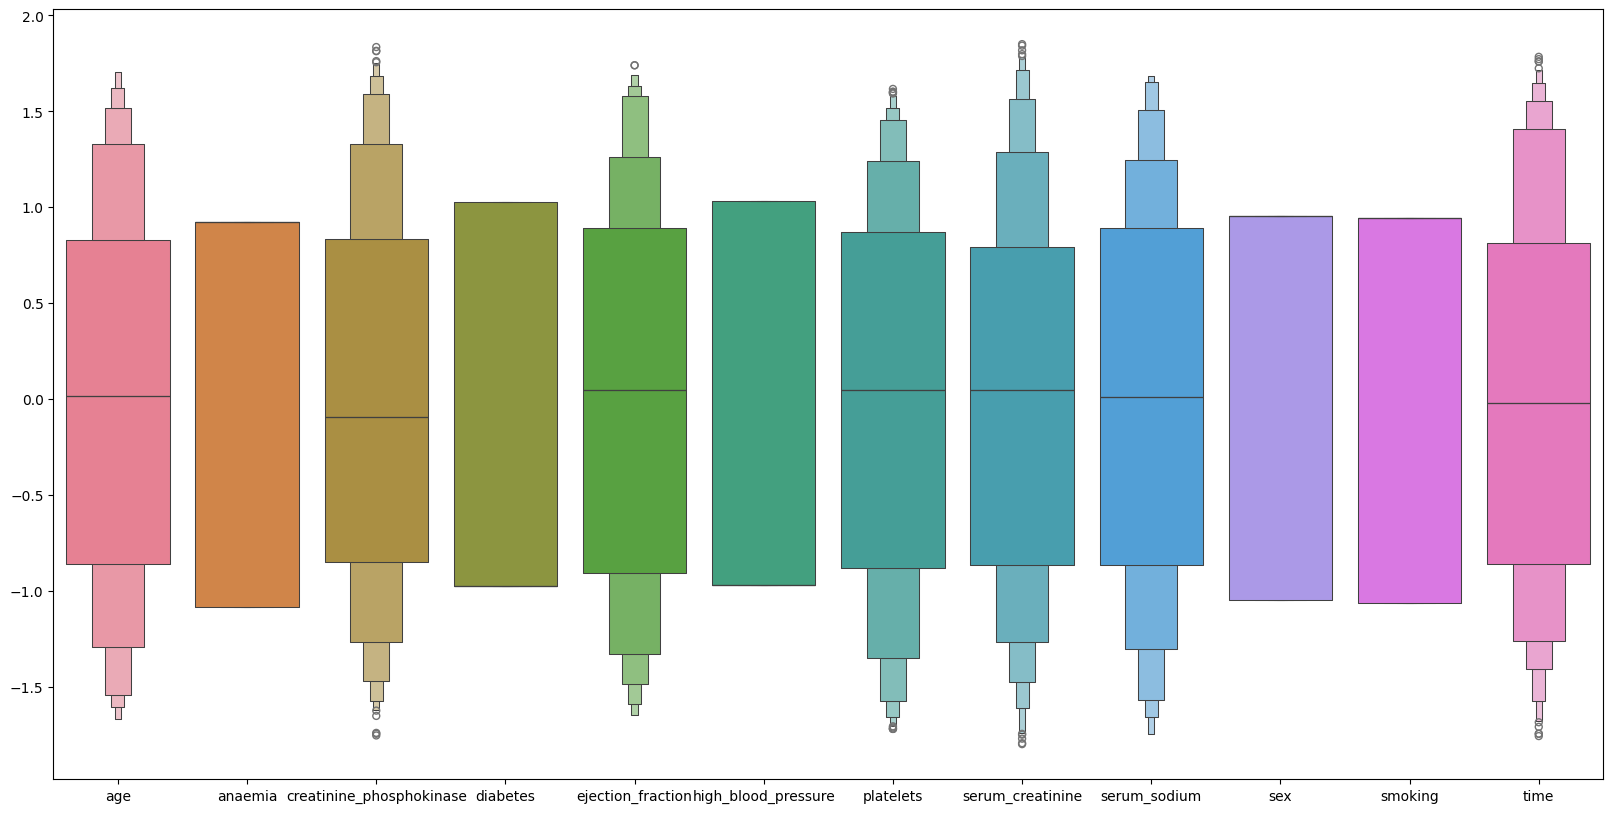

In [ ]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=X_scaled)
plt.show()

In [ ]:
X_train,X_tests,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [ ]:
model1=svm.SVC()

In [ ]:
model1.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=model1.predict(X_tests)

In [ ]:
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0])

In [ ]:
y_test

,DEATH_EVENT
203,0
266,1
152,1
9,1
233,1
226,1
196,1
109,1
5,0
175,1


In [ ]:
y_train

,DEATH_EVENT
232,1
59,0
6,1
185,1
173,0
...,...
188,1
71,0
106,1
270,1


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.38      0.54      0.45        24
           1       0.58      0.42      0.48        36

    accuracy                           0.47        60
   macro avg       0.48      0.48      0.47        60
weighted avg       0.50      0.47      0.47        60



In [ ]:
early_stopping=callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    verbose=1,
    restore_best_weights=True
)

model=Sequential()

model.add(Dense(units=16,kernel_initializer="uniform",activation='relu',input_dim=(12)))
model.add(Dense(units=8,kernel_initializer="uniform",activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8,kernel_initializer="uniform",activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,kernel_initializer="uniform",activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train,y_train,batch_size=25,epochs=100,callbacks=[early_stopping],validation_split=0.25)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.6058 - loss: 0.6931 - val_accuracy: 0.5167 - val_loss: 0.6931
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5605 - loss: 0.6929 - val_accuracy: 0.5167 - val_loss: 0.6930
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5352 - loss: 0.6929 - val_accuracy: 0.5167 - val_loss: 0.6930
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5562 - loss: 0.6926 - val_accuracy: 0.5167 - val_loss: 0.6930
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5228 - loss: 0.6928 - val_accuracy: 0.5167 - val_loss: 0.6929
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4813 - loss: 0.6935 - val_accuracy: 0.5167 - val_loss: 0.6929
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5532 - loss: 0.6923 - val_accuracy: 0.5167 - val_loss: 0.6929
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5077 - loss: 0.6929 - val_accuracy: 0.5167 - val_loss:

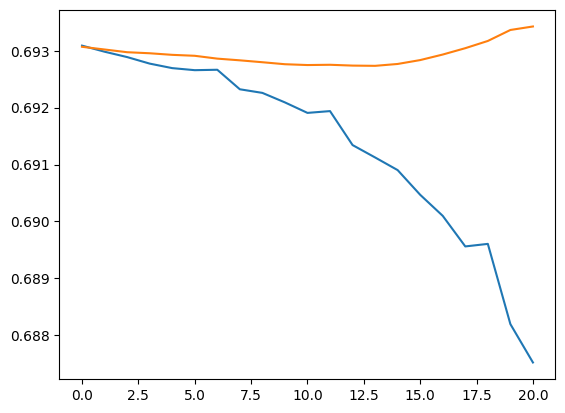

In [ ]:
history_df=pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['loss']],label="Training loss")
plt.plot(history_df.loc[:,['val_loss']],label="Validaion loss")
plt.show()

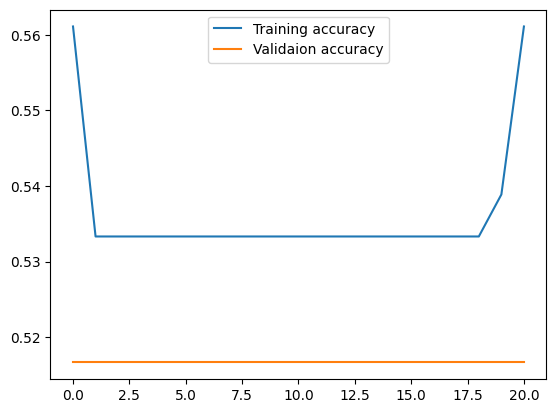

In [ ]:
plt.plot(history_df.loc[:,['accuracy']],label="Training accuracy")
plt.plot(history_df.loc[:,['val_accuracy']],label="Validaion accuracy")
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_tests)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


In [ ]:
y_pred=(y_pred>0.5)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.60      1.00      0.75        36

    accuracy                           0.60        60
   macro avg       0.30      0.50      0.38        60
weighted avg       0.36      0.60      0.45        60



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
